# Question 2

In [1]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
import h5py # to be able to use v7.3 .mat files in Python
from scipy.spatial.distance import cdist # Python equivalent of pdist2

/Users/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
with h5py.File('hw4_data2.mat', 'r') as file:
    data_keys = list(file.keys())

data = dict()
with h5py.File('hw4_data2.mat', 'r') as file:
    for key in data_keys:
        data[key] = np.array(file[key])
        print('Shape of the data associated with %s:' % key,
              np.shape(data[key]), '\n')

Shape of the data associated with stype: (181, 1) 

Shape of the data associated with vresp: (1626, 181) 



In [3]:
# QUESTION 2
print('QUESTION 2')

QUESTION 2


In [4]:
stype = data['stype']
vresp = data['vresp'].T

In [5]:
# PART A
print('PART A')

PART A


In [6]:
# Compute similarity matrices using different metrics
sim_euclidean = cdist(vresp, vresp, metric='euclidean')
sim_cosine = cdist(vresp, vresp, metric='cosine')
sim_correlation = cdist(vresp, vresp, metric='correlation')

In [ ]:
def dist_cosine(X):
    num_rows, num_cols = X.shape
    dist = np.zeros(num_rows, num_cols)
    for row in num_rows:
        for col in num_cols:
            dist[row, col] = 

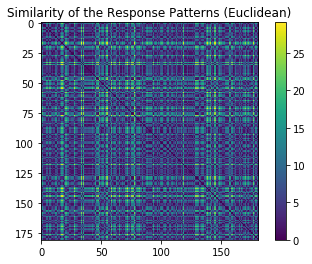

In [7]:
figure_num = 1
plt.figure(figure_num)
figure_num += 1
plt.imshow(sim_euclidean)
plt.colorbar()
plt.title('Similarity of the Response Patterns (Euclidean)')
plt.show(block=False)

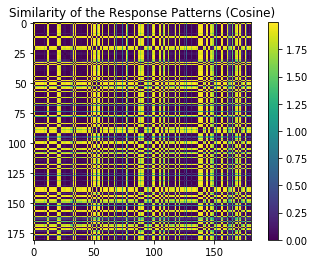

In [8]:
plt.figure(figure_num)
figure_num += 1
plt.imshow(sim_cosine)
plt.colorbar()
plt.title('Similarity of the Response Patterns (Cosine)')
plt.show(block=False)

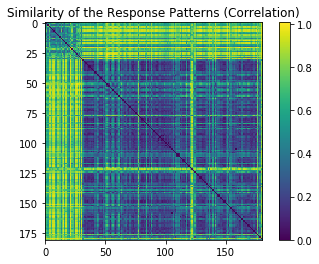

In [9]:
plt.figure(figure_num)
figure_num += 1
plt.imshow(sim_correlation)
plt.colorbar()
plt.title('Similarity of the Response Patterns (Correlation)')
plt.show(block=False)

In [10]:
# PART B
print('PART B')

PART B


In [11]:
def cmdscale(D):
    """
    Implementation of the classical multidimensional scaling (MDS) algorithm.
    Args:
        D: The symmetric matrix containing the distances between n 
            objects in p dimensions
    Returns:
        X: Coordinates of n objects in the new space
    """
    N = D.shape[0]
    # Double centering procedure
    J = np.eye(N) - np.ones((N, N)) / N
    B = - J.dot(D ** 2).dot(J) / 2 # = X.X^T
    # Diagonalization
    evals, evecs = np.linalg.eigh(B)
    # Sort eigenpairs according to the descending order of eigenvalues                                               
    idx = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:, idx]
    # Extract the positive eigenvalues 
    pos_idx = np.where(evals > 0)[0]
    L = np.diag(np.sqrt(evals[pos_idx]))
    E = evecs[:, pos_idx]
    X = E.dot(L)
    return X

In [12]:
# Run classical MDS
MDS_euclidean = cmdscale(sim_euclidean)
MDS_cosine = cmdscale(sim_cosine)
MDS_correlation = cmdscale(sim_correlation)

In [13]:
X_euclidean = MDS_euclidean[:, 0:2]
X_cosine = MDS_cosine[:, 0:2]
X_correlation = MDS_correlation[:, 0:2]

In [14]:
SPEECH_INDICES = np.where(stype == 1)[0]
NATURE_SOUND_INDICES = np.where(stype == 2)[0]

In [15]:
# Separate data with different labels
X_speech_euclidean = X_euclidean[SPEECH_INDICES]
X_nature_euclidean = X_euclidean[NATURE_SOUND_INDICES]
X_speech_cosine = X_cosine[SPEECH_INDICES]
X_nature_cosine = X_cosine[NATURE_SOUND_INDICES]
X_speech_correlation = X_correlation[SPEECH_INDICES]
X_nature_correlation = X_correlation[NATURE_SOUND_INDICES]

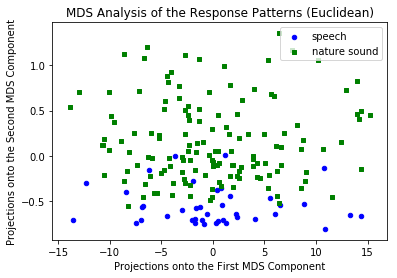

In [16]:
plt.figure(figure_num)
figure_num += 1
plt.scatter(X_speech_euclidean[:, 0], X_speech_euclidean[:, 1], s=20, marker='o', c='b')
plt.scatter(X_nature_euclidean[:, 0], X_nature_euclidean[:, 1], s=20, marker='s', c='g')
plt.xlabel('Projections onto the First MDS Component')
plt.ylabel('Projections onto the Second MDS Component')
plt.title('MDS Analysis of the Response Patterns (Euclidean)')
plt.legend(['speech', 'nature sound'])
plt.show(block=False)

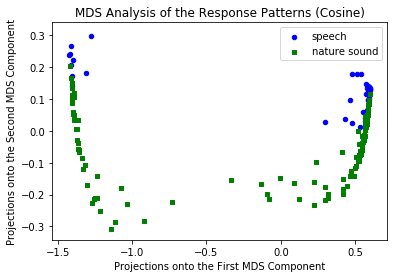

In [17]:
plt.figure(figure_num)
figure_num += 1
plt.scatter(X_speech_cosine[:, 0], X_speech_cosine[:, 1], s=20, marker='o', c='b')
plt.scatter(X_nature_cosine[:, 0], X_nature_cosine[:, 1], s=20, marker='s', c='g')
plt.xlabel('Projections onto the First MDS Component')
plt.ylabel('Projections onto the Second MDS Component')
plt.title('MDS Analysis of the Response Patterns (Cosine)')
plt.legend(['speech', 'nature sound'])
plt.show(block=False)

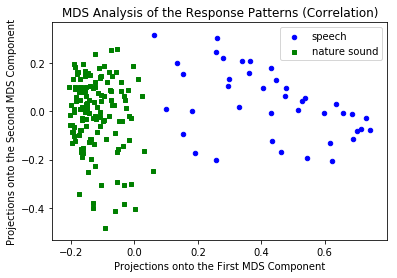

In [18]:
plt.figure(figure_num)
figure_num += 1
plt.scatter(X_speech_correlation[:, 0], X_speech_correlation[:, 1], s=20, marker='o', c='b')
plt.scatter(X_nature_correlation[:, 0], X_nature_correlation[:, 1], s=20, marker='s', c='g')
plt.xlabel('Projections onto the First MDS Component')
plt.ylabel('Projections onto the Second MDS Component')
plt.title('MDS Analysis of the Response Patterns (Correlation)')
plt.legend(['speech', 'nature sound'])
plt.show(block=False)

In [19]:
# PART C
print('PART C')

PART C


In [20]:
def init_clusters(data, k, seed=7):
    """
    Initializes k cluster centers (means).
    Args:
        data: The input data 
        k: Preferred number of clusters
        seed: Random seed for reproducibility (default is 7)
    Returns:
        centers: Array of k cluster centers
    """
    N = data.shape[0] # number of samples
    np.random.seed(seed)
    cluster_idx = np.random.choice(N, k)
    centers = data[cluster_idx]
    return centers

In [21]:
def build_dist_matrix(data, centers):
    """
    Builds a distance matrix containing the distance
    of each point to each cluster center.
    Args:
        data: The input data
        centers: Array of k cluster centers
    Returns:
        dist_matrix: The distance matrix, entry (i, j)
            represents the distance of the ith data point
            to the jth cluster center.
    """
    N = data.shape[0]
    K = centers.shape[0]
    dist_matrix = []
    for k in range(K):
        dist_matrix.append(np.sum((data - centers[k]) ** 2, axis=1))
    return np.array(dist_matrix).T

In [22]:
def param_update_kmeans(data, old_centers):
    """
    Performs the parameter updates in a kmeans iteration.
    Args:
        data: The input data
        old_centers: Array of k cluster centers before the update
    Returns: 
        losses: Loss computed for each data point
        assignments: Assignment vector indicating which data 
            point belongs to which cluster
        centers: Array of k cluster centers after the update
    """
    N, F = data.shape
    K = old_centers.shape[1]
    dist_matrix = build_dist_matrix(data, old_centers)
    assignments = np.argmin(dist_matrix, axis=1)
    losses = []
    for i in range(N):
        assignment = assignments[i]
        point_cluster = old_centers[assignment]
        losses.append(np.sum((data[i] - point_cluster) ** 2))
    centers = []
    for k in range(K):
        cluster_idx = np.where(assignments == k)[0]
        centers.append(np.mean(data[cluster_idx], axis=0))
    return np.array(losses), assignments, np.array(centers)

In [23]:
def kmeans(data, k, max_iters=100, threshold=1e-5):
    """
    Implementation of the kmeans clustering algorithm.
    Args:
        data: The input data
        k: Preferred number of clusters
        max_iters: Maximum number of iterations to run the algorithm
            (default is 100)
        threshold: The threshold in the change in kmeans' loss metric, the 
            algorithm converges when the threshold is reached (default is 1e-5)
    Returns:
        assignments: Assignment vector indicating which data 
            point belongs to which cluster
        centers: Array of final k cluster centers 
    """
    centers_old = init_clusters(data, k)
    avg_losses = []
    for i in range(max_iters):
        # Perform iteration updates
        losses, assignments, centers = param_update_kmeans(data, centers_old)
        avg_loss = np.mean(losses)
        avg_losses.append(avg_loss)
        # Check for convergence
        if i > 0 and np.abs(avg_losses[-1] - avg_losses[-2]) <= threshold:
            break
        # Prepare for the next iteration
        centers_old = centers
    return assignments, centers_old 

In [24]:
# Run kmeans for different metrics
assignments_euclidean, centers_euclidean = kmeans(X_euclidean, 2)
assignments_cosine, centers_cosine = kmeans(X_cosine, 2)
assignments_correlation, centers_correlation = kmeans(X_correlation, 2)

In [25]:
# Separate the clusters' data
X_0_euclidean = X_euclidean[np.where(assignments_euclidean == 0)[0]]
X_1_euclidean = X_euclidean[np.where(assignments_euclidean == 1)[0]]
X_0_cosine = X_cosine[np.where(assignments_cosine == 0)[0]]
X_1_cosine = X_cosine[np.where(assignments_cosine == 1)[0]]
X_0_correlation = X_correlation[np.where(assignments_correlation == 0)[0]]
X_1_correlation = X_correlation[np.where(assignments_correlation == 1)[0]]

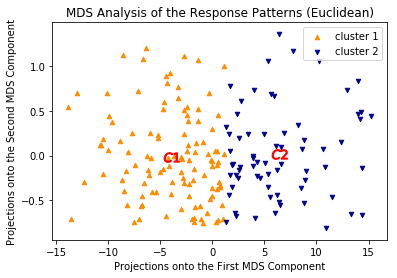

In [26]:
plt.figure(figure_num)
figure_num += 1
plt.scatter(X_0_euclidean[:, 0], X_0_euclidean[:, 1], s=20, marker='^', c='darkorange')
plt.scatter(X_1_euclidean[:, 0], X_1_euclidean[:, 1], s=20, marker='v', c='darkblue')
plt.scatter(centers_euclidean[0, 0], centers_euclidean[0, 1], s=250, marker='$C1$', c='r')
plt.scatter(centers_euclidean[1, 0], centers_euclidean[1, 1], s=250, marker='$C2$', c='r')
plt.xlabel('Projections onto the First MDS Component')
plt.ylabel('Projections onto the Second MDS Component')
plt.title('MDS Analysis of the Response Patterns (Euclidean)')
plt.legend(['cluster 1', 'cluster 2'])
plt.show(block=False)

In [27]:
print('Cluster centers (Euclidean)')
print('Center of cluster 1: (%f, %f)' % (centers_euclidean[0, 0], centers_euclidean[0, 1]))
print('Center of cluster 2: (%f, %f)' % (centers_euclidean[1, 0], centers_euclidean[1, 1]))

Cluster centers (Euclidean)
Center of cluster 1: (-3.967307, -0.011665)
Center of cluster 2: (6.439686, 0.018934)


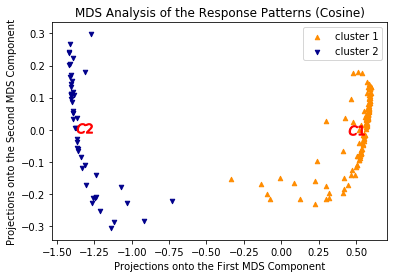

In [28]:
plt.figure(figure_num)
figure_num += 1
plt.scatter(X_0_cosine[:, 0], X_0_cosine[:, 1], s=20, marker='^', c='darkorange')
plt.scatter(X_1_cosine[:, 0], X_1_cosine[:, 1], s=20, marker='v', c='darkblue')
plt.scatter(centers_cosine[0, 0], centers_cosine[0, 1], s=250, marker='$C1$', c='r')
plt.scatter(centers_cosine[1, 0], centers_cosine[1, 1], s=250, marker='$C2$', c='r')
plt.xlabel('Projections onto the First MDS Component')
plt.ylabel('Projections onto the Second MDS Component')
plt.title('MDS Analysis of the Response Patterns (Cosine)')
plt.legend(['cluster 1', 'cluster 2'])
plt.show(block=False)

In [29]:
print('Cluster centers (Cosine)')
print('Center of cluster 1: (%f, %f)' % (centers_cosine[0, 0], centers_cosine[0, 1]))
print('Center of cluster 2: (%f, %f)' % (centers_cosine[1, 0], centers_cosine[1, 1]))

Cluster centers (Cosine)
Center of cluster 1: (0.503391, -0.002436)
Center of cluster 2: (-1.318885, 0.006383)


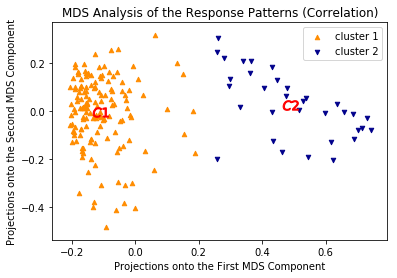

In [30]:
plt.figure(figure_num)
figure_num += 1
plt.scatter(X_0_correlation[:, 0], X_0_correlation[:, 1], s=20, marker='^', c='darkorange')
plt.scatter(X_1_correlation[:, 0], X_1_correlation[:, 1], s=20, marker='v', c='darkblue')
plt.scatter(centers_correlation[0, 0], centers_correlation[0, 1], s=250, marker='$C1$', c='r')
plt.scatter(centers_correlation[1, 0], centers_correlation[1, 1], s=250, marker='$C2$', c='r')
plt.xlabel('Projections onto the First MDS Component')
plt.ylabel('Projections onto the Second MDS Component')
plt.title('MDS Analysis of the Response Patterns (Correlation)')
plt.legend(['cluster 1', 'cluster 2'])
plt.show(block=False)

In [31]:
print('Cluster centers (Correlation)')
print('Center of cluster 1: (%f, %f)' % (centers_correlation[0, 0], centers_correlation[0, 1]))
print('Center of cluster 2: (%f, %f)' % (centers_correlation[1, 0], centers_correlation[1, 1]))

Cluster centers (Correlation)
Center of cluster 1: (-0.108990, -0.005833)
Center of cluster 2: (0.488804, 0.026160)


In [32]:
plt.show()